In [1]:
import numpy as np
import json
from pprint import pprint
import matplotlib.pyplot as plt
from collections import defaultdict
plt.rcParams['figure.figsize'] = [16, 58]
from plot_utils import *

In [16]:
def get_sp_score(smin,max_smin):
    return 1.0 - (smin/max_smin)

def plot_spuriousness_score(epoch_num,run_list,pval_list,fname_pattern,sample_size,max_smin_acc):
    #Estimating the spuriousness score for each of the p-value
    sp_score_gold = []
    sp_score_ubound = []
    sp_score_lbound = []
    smin_list = []
    for pval in pval_list:
        #Getting the gold-score
        actual_dict = get_all_result_dict(run_list=run_list,
                            pval_list=[pval,],
                            enum=epoch_num,
                            fname_pattern=fname_pattern.format(sample_size,"{}","{}")
        )
        sp_score_gold.append(get_sp_score(actual_dict[pval]["topic0_smin"]["mean"],max_smin_acc))
        smin_list.append(actual_dict[pval]["topic0_smin"]["mean"])
        
        #Getting the estimate of the sp-score
        estm_sample_size = int(2*(1-pval)*sample_size)
        estm_dict = get_all_result_dict(run_list=run_list,
                            pval_list=[0.5,],
                            enum=epoch_num,
                            fname_pattern=fname_pattern.format(estm_sample_size,"{}","{}")
        )
        sp_score_lbound.append(get_sp_score(actual_dict[pval]["topic0_smin"]["mean"],estm_dict[pval]["topic0_smin"]["mean"]))
        sp_score_ubound.append(get_sp_score(actual_dict[pval]["topic0_smin"]["mean"],1))
    
    #Plotting the estimate
    fig,ax = plt.subplots(2,)
    #Plotting the smin value
    ax[0].plot(pval_list,smin_list,marker="o",ls="-.")
    #Plotting the sp-score
    ax[1].errorbar(pval_list,sp_score_gold)
    
        
        

# Getting the Acc(Smin)<sup>inf</sup><sub>p=0.5</sub>

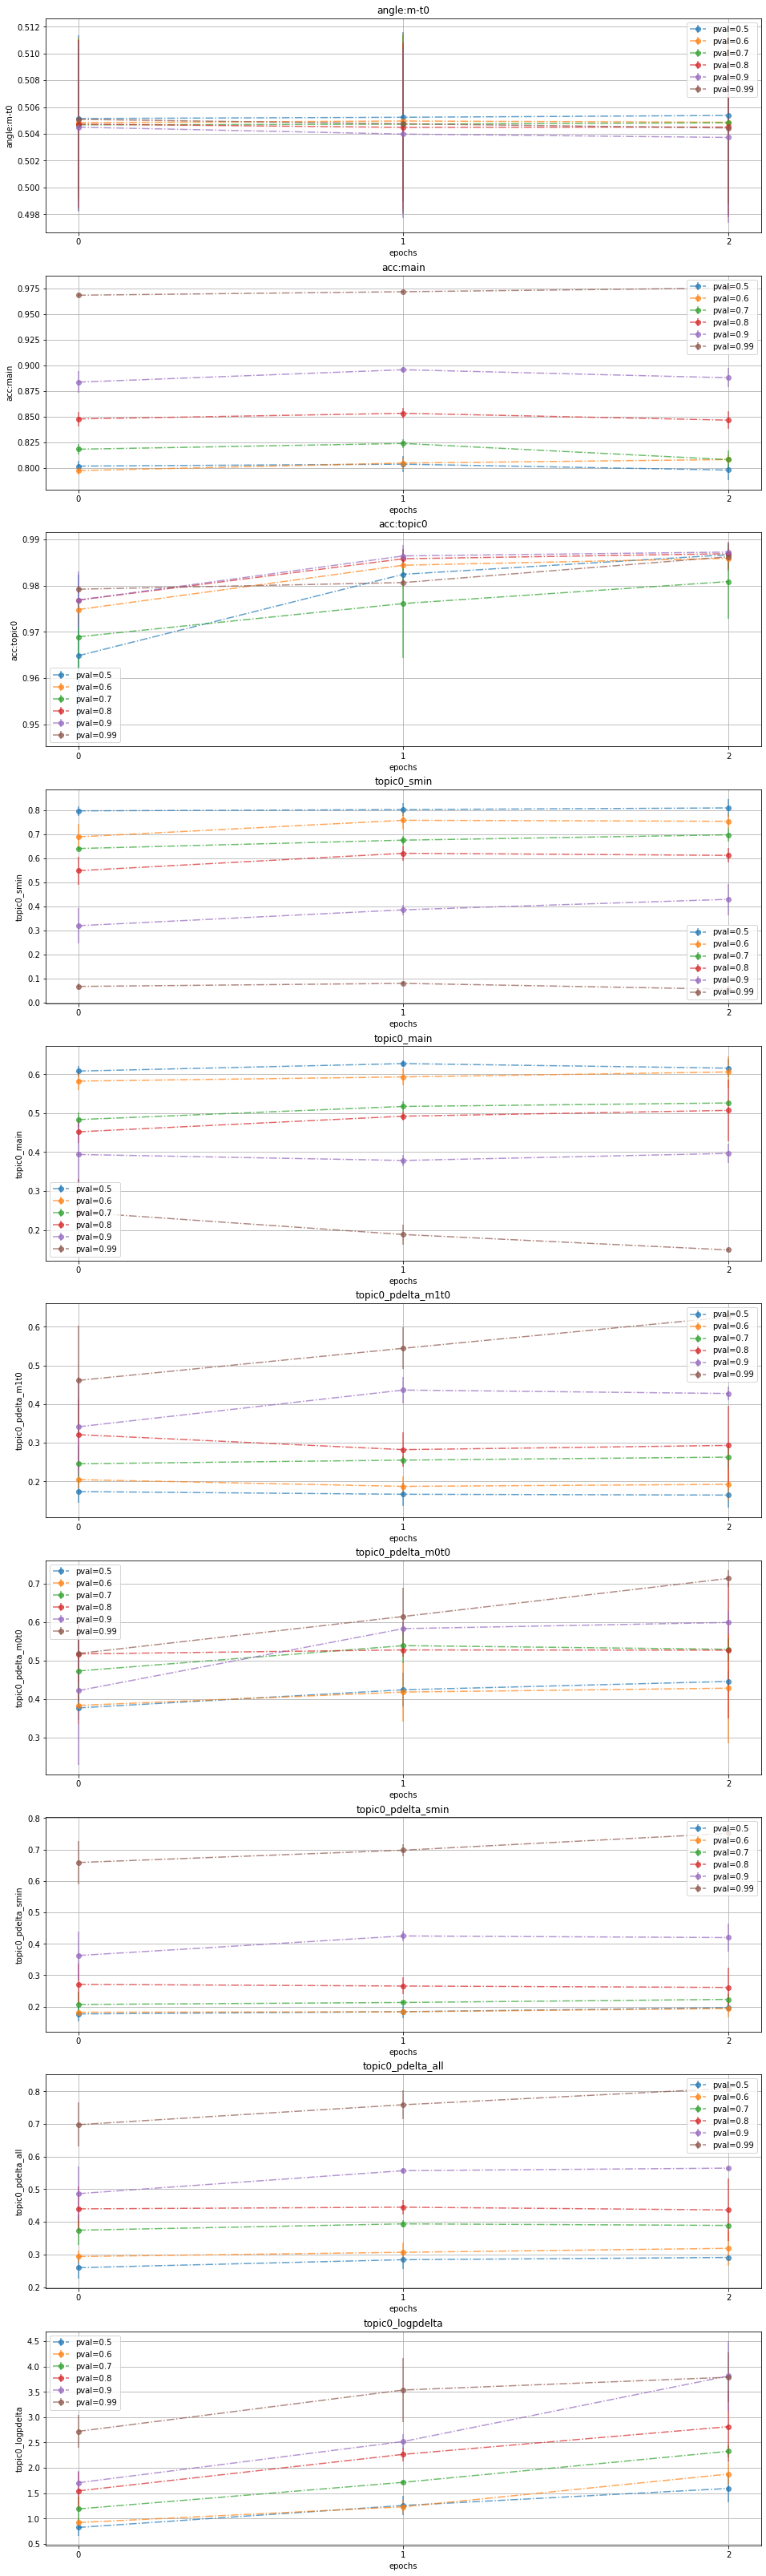

In [20]:
#Getting the best possbile Acc(Smin) estimate
run_list=[1,2,3]
pval_list=[0.5,0.6,0.7,0.8,0.9,0.99]
plot_item_list = [
                    "angle:m-t0",
                    "acc:main",
                    "acc:topic0",
                    "topic0_smin",
                    "topic0_main",
                    "topic0_pdelta_m1t0",
                    "topic0_pdelta_m0t0",
                    "topic0_pdelta_smin",
                    "topic0_pdelta_all",
                    "topic0_logpdelta",
]


ax=None

#Other hyperparam
model_type="bert-base-uncased"
lt="x_entropy"
drate=0.0
l2=0.0
hretrain="no_warm_encoder"
d="non_causal"
n=0.0
h=0
e=3
s=35000
neg1_flip_method="remove_negation"
all_result_dict = get_all_result_timeline(run_list=run_list,
                                      pval_list=pval_list,
                                      fname_pattern="nlp_logs/pt.rel.model_type({}).neg1_fmethod({}).lt({}).dropout_rate({}).l2({}).noise({}).hlayer({}).sample({}).epoch({}).pval({}).rnum({})/probe_metric_list.json".format(
                                                                              model_type,
                                                                              neg1_flip_method,
                                                                              lt,
                                                                              drate,
                                                                              l2,
                                                                              n,
                                                                              h,
                                                                              s,
                                                                              e,
                                                                              "{}",
                                                                              "{}",
                                      )
)
plot_one_timeline(pval_list,all_result_dict,plot_item_list)

In [11]:
acc_smin_gold_estimate = all_result_dict[0.5]["topic0_smin"]["mean"][-1]
acc_smin_gold_std = all_result_dict[0.5]["topic0_smin"]["std"][-1]
print("Acc(Smin) gold accuracy estimate: {}".format(acc_smin_gold_estimate))
print("Acc(Smin) gold accuracy std: {}".format(acc_smin_gold_std))

Acc(Smin) gold accuracy estimate: 0.8083794116973877
Acc(Smin) gold accuracy std: 0.03688238009930482


In [21]:
#Plotting the spuriousness score
run_list=[0,]
pval_list=[0.5,0.6,0.7,0.8,0.9,0.99]
model_type="bert-base-uncased"
lt="x_entropy"
drate=0.0
l2=0.0
hretrain="no_warm_encoder"
d="non_causal"
n=0.0
h=0
e=3
s=10000
neg1_flip_method="remove_negation"
fname_pattern="nlp_logs/pt.rel.model_type({}).neg1_fmethod({}).lt({}).dropout_rate({}).l2({}).noise({}).hlayer({}).sample({}).epoch({}).pval({}).rnum({})/probe_metric_list.json".format(
                                  model_type,
                                  neg1_flip_method,
                                  lt,
                                  drate,
                                  l2,
                                  n,
                                  h,
                                  "{}",
                                  e,
                                  "{}",
                                  "{}",
)
plot_spuriousness_score(e,run_list,pval_list,fname_pattern,s,acc_smin_gold_estimate)

FileNotFoundError: [Errno 2] No such file or directory: 'nlp_logs/pt.rel.model_type(bert-base-uncased).neg1_fmethod(remove_negation).lt(x_entropy).dropout_rate(0.0).l2(0.0).noise(0.0).hlayer(0).sample(10000).epoch(3).pval(0.5).rnum(0)/probe_metric_list.json'